# Newton's Law of Cooling

Presented by: [Noureddine Meraihi](linkedin.com/in/nmeraihi)

For University of Doha for Science and Technology

October 9, 2024

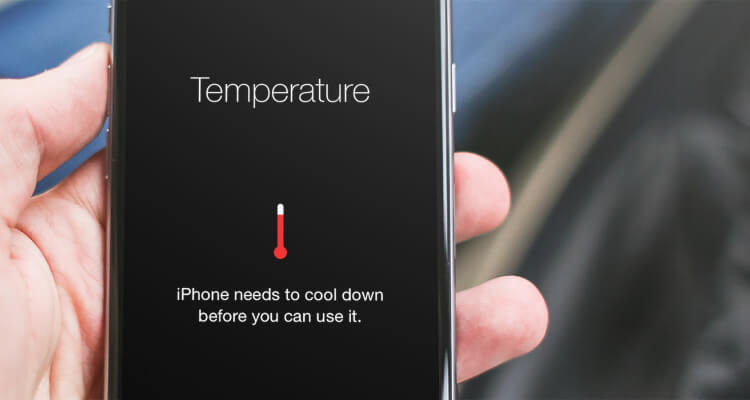

Newton’s Law of Cooling states that the **rate of change** of the temperature of an object, $T(t)$ with respext to time **$t$**, is **proportional** to the **difference** between the **temperature of the object** and the **surrounding (ambient) temperature, $T_s$**. 

## Mathematically, 

this is represented as:

$$
\frac{dT(t)}{dt} = -k \left( T(t) - T_s \right)
$$


Where:
- $T(t)$ is the temperature of the object at time $t$,
- $T_s$ is the surrounding temperature,
- $\frac{d T(t)}{d t}$ is the rate of temperature change of the object over time,
- $k$ is a positive constant (cooling constant) that depends on the properties of the object and the surrounding medium.

> In other words, Newton's law of cooling is a physical law which states that the **rate of heat loss** of a body is directly **proportional** to the **difference in the temperatures between the body and its environment**.

## Let's find that function




The solution to this differential equation is:

$$
T(t) = T_s + \left( T_0 - T_s \right) e^{-kt}
$$

Where:
- $T_0$ is the initial temperature of the object at $t = 0$,
- $e^{-kt}$ represents the exponential decay, showing how the temperature difference decreases over time.



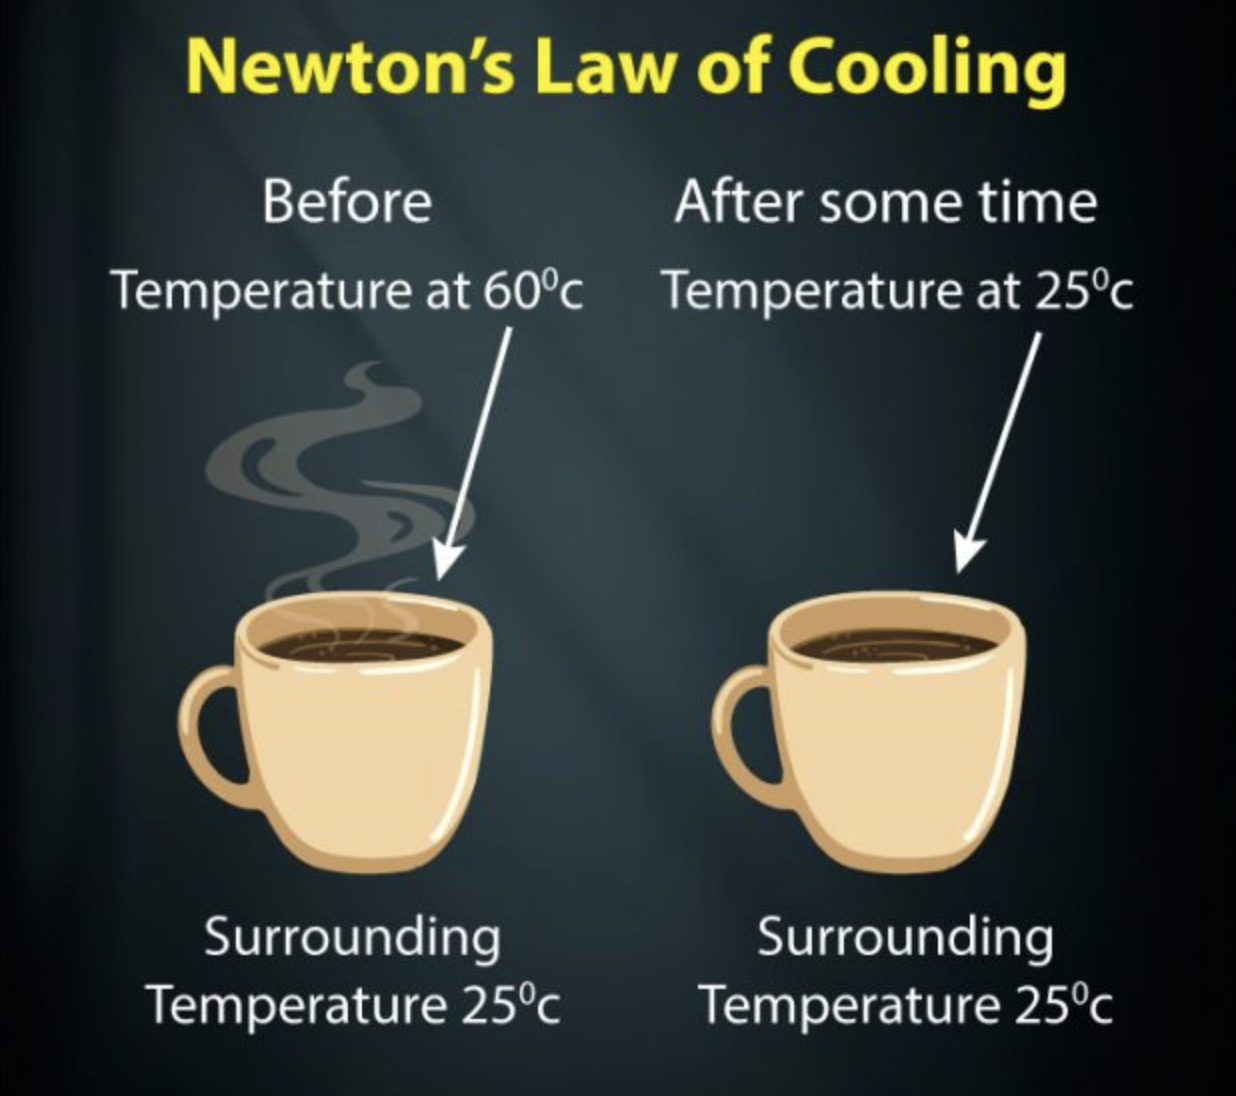

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [11]:
def newtons_law_of_cooling(T_0, T_a, k, t):
    return T_a + (T_0 - T_a) * np.exp(-k * t)

In [12]:
def plot_cooling(T_0=100, T_a=25, k=0.1, T=10):
    t_vals = np.linspace(0, T, 500)
    T_vals = newtons_law_of_cooling(T_0, T_a, k, t_vals)
    
    plt.figure(figsize=(8, 6))
    plt.plot(t_vals, T_vals, label=r'$T(t)$', color='orange')
    plt.fill_between(t_vals, T_vals, color='orange', alpha=0.3)
    plt.title("Newton's Law of Cooling")
    plt.xlabel('Time (t)')
    plt.ylabel('Temperature (T)')
    plt.ylim(0, T_0 + 10)
    plt.grid(True)
    plt.show()

In [14]:
interact(plot_cooling, 
         T_0=FloatSlider(min=0, max=100, step=1, value=100, description="Initial Temp (T₀)"),
         T_a=FloatSlider(min=-30, max=100, step=1, value=25, description="Ambient Temp (Tₐ)"),
         k=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description="Cooling Constant (k)"),
         T=FloatSlider(min=1, max=100, step=0.5, value=10, description="Time Elapsed (T)"))

interactive(children=(FloatSlider(value=100.0, description='Initial Temp (T₀)', step=1.0), FloatSlider(value=2…

<function __main__.plot_cooling(T_0=100, T_a=25, k=0.1, T=10)>

In [5]:
def newtons_law_of_heating(t, T_car, T_phone_initial, k):
    return T_car + (T_phone_initial - T_car) * np.exp(-k * t)

In [6]:
def plot_phone_heating(T_phone_initial=25, T_car=60, k=0.01, T=600):
    # Time values (in seconds)
    t_vals = np.linspace(0, T, 500)
    
    # Compute temperature values using Newton's Law of Heating
    T_vals = newtons_law_of_heating(t_vals, T_car, T_phone_initial, k)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(t_vals, T_vals, label=r'Temperature $T_{\text{phone}}(t)$', color='orange')
    plt.axhline(y=45, color='red', linestyle='--', label="Overheat Warning (45°C)")
    plt.fill_between(t_vals, T_vals, color='orange', alpha=0.3)
    plt.title("Phone Overheating in a Hot Car")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Temperature (°C)")
    plt.ylim(20, 70)
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
interact(plot_phone_heating,
         T_phone_initial=FloatSlider(min=20, max=40, step=1, value=25, description="Initial Temp (T₀)"),
         T_car=FloatSlider(min=50, max=80, step=1, value=60, description="Car Temp (T_car)"),
         k=FloatSlider(min=0.001, max=0.03, step=0.001, value=0.01, description="Heating Constant (k)"),
         T=FloatSlider(min=60, max=1200, step=60, value=600, description="Time Elapsed (T)"))

interactive(children=(FloatSlider(value=25.0, description='Initial Temp (T₀)', max=40.0, min=20.0, step=1.0), …

<function __main__.plot_phone_heating(T_phone_initial=25, T_car=60, k=0.01, T=600)>

##  Simulated  data

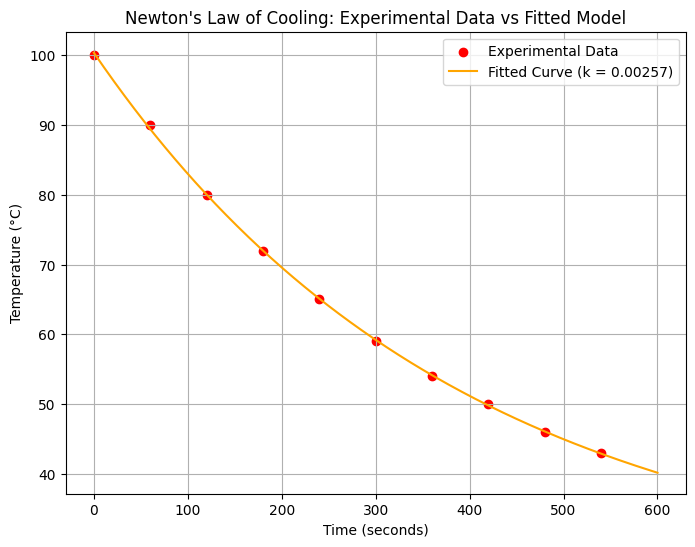

Ambient Temperature (T_s) = 23.77 °C
Initial Temperature (T_0) = 100.35 °C
Cooling Constant (k) = 0.00257 s⁻¹


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Simulated  data
time_data = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])  # seconds
temp_data = np.array([100, 90, 80, 72, 65, 59, 54, 50, 46, 43])       # In C


def newtons_law_of_cooling(t, T_s, T_0, k):
    return T_s + (T_0 - T_s) * np.exp(-k * t)

# Initial guess for the ambient temperature, initial temperature, and k
initial_guess = [25, 100, 0.01]

# Fit the curve
params, covariance = curve_fit(newtons_law_of_cooling, time_data, temp_data, p0=initial_guess)
T_s_fit, T_0_fit, k_fit = params

# Generate time values for the fitted model
time_model = np.linspace(0, 600, 500)
temp_model = newtons_law_of_cooling(time_model, T_s_fit, T_0_fit, k_fit)

# Plotting the experimental data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(time_data, temp_data, label="Experimental Data", color="red")
plt.plot(time_model, temp_model, label=f"Fitted Curve (k = {k_fit:.5f})", color="orange")

# Adding labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (°C)")
plt.title("Newton's Law of Cooling: Experimental Data vs Fitted Model")
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Ambient Temperature (T_s) = {T_s_fit:.2f} °C")
print(f"Initial Temperature (T_0) = {T_0_fit:.2f} °C")
print(f"Cooling Constant (k) = {k_fit:.5f} s⁻¹")


1. **Derivation**:

   Based on the law:

   $$
   \frac{dT}{dt} = -k(T - T_{\text{ambient}})
   $$

2. **Separate Variables**:

   Rearranging terms:

   $$
   \frac{dT}{T - T_{\text{ambient}}} = -k\,dt
   $$

3. **Integrate Both Sides**:

   $$
   \int \frac{1}{T - T_{\text{ambient}}} dT = -k \int dt
   $$

   This gives:

   $$
   \ln |T - T_{\text{ambient}}| = -k t + C
   $$

   where $C$ is the constant of integration.

4. **Solve for $T$**:

   Exponentiate both sides:

   $$
   T - T_{\text{ambient}} = e^{-k t + C} = C' e^{-k t}
   $$

   where $C' = e^{C}$.

5. **Determine $C'$ Using Initial Conditions**:

   If at $t = 0$, $T = T_0$:

   $$
   T_0 - T_{\text{ambient}} = C' e^{0} \implies C' = T_0 - T_{\text{ambient}}
   $$

6. **Final Solution**:

   $$
   T(t) = T_{\text{ambient}} + (T_0 - T_{\text{ambient}}) e^{-k t}
   $$


# Why K is negative?


## In terms of **slope**, the negative sign in the equation

$$\frac{dT(t)}{dt} = -k \left( T(t) - T_s \right)$$

can be explained as follows:

- The temperature curve $T(t)$ decreases over time as the object cools, meaning that the **slope** of the curve is **negative**. The derivative $\frac{dT(t)}{dt}$ represents this slope at any given time.
- When $T(t) > T_s$ (the object's temperature is higher than the ambient temperature), the slope is **negative** because the temperature decreases with time.
- The **negative sign** before $k$ ensures that the derivative $\frac{dT(t)}{dt}$ is **negative** when $T(t) > T_s$, meaning the temperature **decreases** (the slope of the curve is downward).
- When you talk about the **tangent** to a curve, you're talking about the **derivative**. The derivative of a function at a point gives the slope of the tangent at that point.

Therefore, the derivative $\frac{dT(t)}{dt}$ measures the **slope** of the temperature curve over time, and the negative sign in Newton's equation ensures that this slope is downward when the object is hotter than the surroundings.


## Direction of temperature change
If something is much, much hotter than the ambient temperature, the rate of change should be pretty steep, it should be declining in temperature quickly.

That's why, the negative sign in the equation

$$\frac{dT(t)}{dt} = -k \left( T(t) - T_s \right)$$

is important because it indicates the **direction** of temperature change. 

### Temperature Difference:
- The term $T(t) - T_s$ represents the difference between the object’s temperature $T(t)$ at time $t$ and the surrounding (ambient) temperature $T_s$.
- If $T(t) > T_s$, the object is hotter than the surroundings, so $T(t) - T_s$ is **positive**.
- If $T(t) < T_s$, the object is cooler than the surroundings, so $T(t) - T_s$ is **negative**.

### Cooling or Heating:
- **Cooling**: When $T(t) > T_s$ (the object is hotter than the surroundings), the object should lose heat over time, meaning the temperature $T(t)$ should decrease. This is achieved by having $\frac{dT(t)}{dt}$ be **negative**, indicating a drop in temperature. The negative sign before $k$ ensures that $\frac{dT(t)}{dt}$ is negative when $T(t) > T_s$.
  
- **Heating**: Conversely, if $T(t) < T_s$ (the object is cooler than the surroundings), the object should gain heat, and $\frac{dT(t)}{dt}$ should be **positive**, indicating an increase in temperature. The negative sign ensures that $\frac{dT(t)}{dt}$ is positive when $T(t) < T_s$.

## Role of $k$:
- The constant $k$ is positive and controls how **quickly** the temperature changes. The larger the value of $k$, the faster the object cools or heats.

## Summary:
- The negative sign ensures that the object's temperature $T(t)$ **moves toward the ambient temperature** $T_s$, whether cooling (when $T(t) > T_s$) or heating (when $T(t) < T_s$).
- It reflects the fact that the temperature difference decreases over time, which is consistent with the principle that heat flows from hotter to cooler regions, leading to thermal equilibrium.


# References

1. Khan Academy. (n.d.). Khan Academy. [https://www.khanacademy.org/math/differential-equations/first-order-differential-equations/exponential-models-diff-eq/v/newtons-law-of-cooling](https://www.khanacademy.org/math/differential-equations/first-order-differential-equations/exponential-models-diff-eq/v/newtons-law-of-cooling)
2. Wikipedia contributors. (2024, September 17). Newton’s law of cooling. Wikipedia. [https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)